In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub

c:\Users\Mahdie\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
path = kagglehub.dataset_download("team-ai/spam-text-message-classification")
# print("Path to dataset files:", path)
df = pd.read_csv(f"{path}/SPAM text message 20170820 - Data.csv")
df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


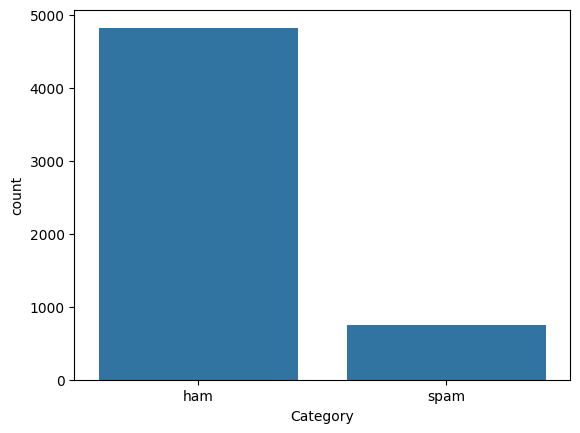

In [5]:
sns.countplot(x=df["Category"])
plt.show()


In [6]:
X = df["Message"]
Y = df["Category"]

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
Y

array([0, 0, 1, ..., 0, 0, 0])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words = 500
tkn = Tokenizer(num_words=max_words)
tkn.fit_on_texts(X_train)
seq = tkn.texts_to_sequences(X_train)
seq

[[24, 256, 72, 2, 456, 18, 217, 65, 54, 53, 35, 155, 19],
 [39,
  78,
  309,
  323,
  156,
  108,
  406,
  441,
  24,
  1,
  259,
  11,
  247,
  43,
  10,
  22,
  292,
  23,
  1,
  30,
  248,
  6,
  347,
  6,
  36,
  317],
 [415,
  50,
  416,
  1,
  277,
  15,
  8,
  11,
  78,
  2,
  417,
  4,
  457,
  23,
  33,
  14,
  250,
  182,
  11,
  72,
  7,
  73,
  6,
  162,
  19,
  1,
  31,
  5,
  310,
  2,
  31,
  206,
  5,
  293],
 [],
 [72, 18, 348, 117],
 [324, 349, 20, 1, 55, 109, 301],
 [442, 43, 407, 88, 9, 13, 62, 47, 161, 137, 167, 418, 4, 3],
 [6, 78, 4, 51, 156, 458, 6, 257, 22, 98, 265, 360],
 [240, 15, 2, 33, 196, 34, 43, 479, 339, 20, 68, 2, 132, 137, 302, 167],
 [21, 419, 2, 325, 4, 443, 32, 3, 4, 99, 17, 138, 420],
 [326, 286, 3, 21, 24, 8, 161],
 [383, 3, 21, 384, 4, 383, 17, 385, 277],
 [57, 37, 197, 43, 6, 84, 39, 78, 22, 241, 370, 309],
 [44,
  143,
  31,
  5,
  20,
  12,
  70,
  12,
  302,
  70,
  2,
  287,
  12,
  34,
  151,
  112,
  233,
  65,
  198,
  386],
 [60, 1, 387

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 100
padded_docs = pad_sequences(seq, padding = 'pre', maxlen= max_len)
padded_docs

array([[  0,   0,   0, ...,  35, 155,  19],
       [  0,   0,   0, ...,   6,  36, 317],
       [  0,   0,   0, ..., 206,   5, 293],
       ...,
       [  0,   0,   0, ...,   3,  81,  28],
       [  0,   0,   0, ..., 330, 286,  88],
       [  0,   0,   0, ...,  26,  42,  41]])

In [11]:
from tensorflow.keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
embedding_vector_features = 30
model = Sequential()
model.add(Embedding(max_words, embedding_vector_features, input_length=max_len))
model.add(LSTM(256))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])


c:\Users\Mahdie\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [12]:
model.fit(padded_docs,Y_train,batch_size=128,epochs=10, validation_split=0.2)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 320ms/step - accuracy: 0.7927 - loss: 0.4726 - val_accuracy: 0.9372 - val_loss: 0.2327
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 285ms/step - accuracy: 0.9439 - loss: 0.2090 - val_accuracy: 0.9585 - val_loss: 0.1084
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 255ms/step - accuracy: 0.9738 - loss: 0.0851 - val_accuracy: 0.9821 - val_loss: 0.0725
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 434ms/step - accuracy: 0.9829 - loss: 0.0685 - val_accuracy: 0.9832 - val_loss: 0.0618
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 450ms/step - accuracy: 0.9844 - loss: 0.0616 - val_accuracy: 0.9798 - val_loss: 0.0614
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 443ms/step - accuracy: 0.9866 - loss: 0.0454 - val_accuracy: 0.9821 - val_loss: 0.0533
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 450ms/step - accuracy: 0.9922 - loss: 0.0338 - val_accuracy: 0.9832 - val_loss: 0.0527
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 447ms/step - accuracy: 0.9903 - loss: 0.0326 - val_accura

In [13]:
text_seq = tkn.texts_to_sequences(X_test)
test_padded = pad_sequences(text_seq, maxlen = max_len)

In [14]:
accr = model.evaluate(test_padded, Y_test)
accr

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9812 - loss: 0.0973


[0.08149787783622742, 0.9802690744400024]

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 30)        │        15,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 256)            │       293,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 927,437 (3.54 MB)

 Trainable params: 309,145 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 618,292 (2.36 MB)

In [20]:
!pip install pyyaml h5py  


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
model.save('model1.h5')